In [1]:
import os, sys, numpy as np
from matplotlib import pyplot as plt
sys.path.append("/Users/gkoolstra/Documents/Code")
from Common import common
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
e = 1.602E-19
eps0 = 8.85E-12
epsHe = 1.056
h = 0.8E-6
a = 20E-9
lamb = 1.2*h

In [3]:
def V_ee(x, y, xi, yi):
    Rij = np.sqrt((x-xi)**2 + (y-yi)**2)
    return e ** 2 / (4 * np.pi * eps0) * 1 / Rij**2

def metal_image_charge(x, y, xi, yi):
    Rij = np.sqrt((x-xi)**2 + (y-yi)**2 + h**2)
    return -e ** 2 / (4 * np.pi * eps0) * 1 / Rij**2
    
def helium_image_charge(x, y, xi, yi):
    Sij = np.sqrt((x-xi)**2 + (y-yi)**2 + a**2)
    alpha = (epsHe-1)/(epsHe+1)
    return -alpha * e ** 2 / (4 * np.pi * eps0) * 1 / Sij**2

def image_charge(x, y, xi, yi):
    return helium_image_charge(x, y, xi, yi) + metal_image_charge(x, y, xi, yi)

def yukawa(x, y, xi, yi, lamb):
    Rij = np.sqrt((x-xi)**2 + (y-yi)**2)
    return e ** 2 / (4 * np.pi * eps0) * 1 / Rij**2 * np.exp(-Rij / lamb)

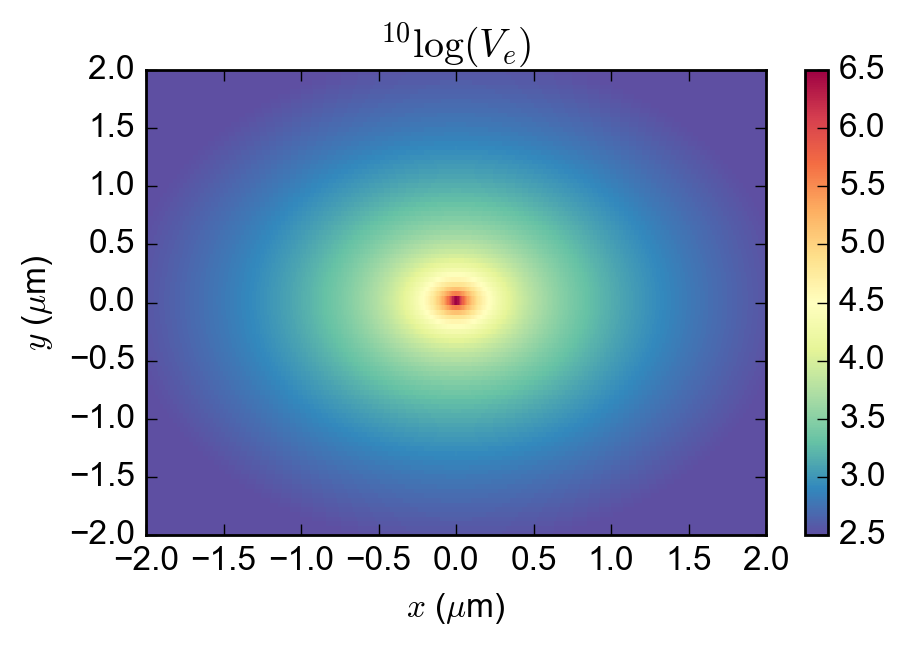

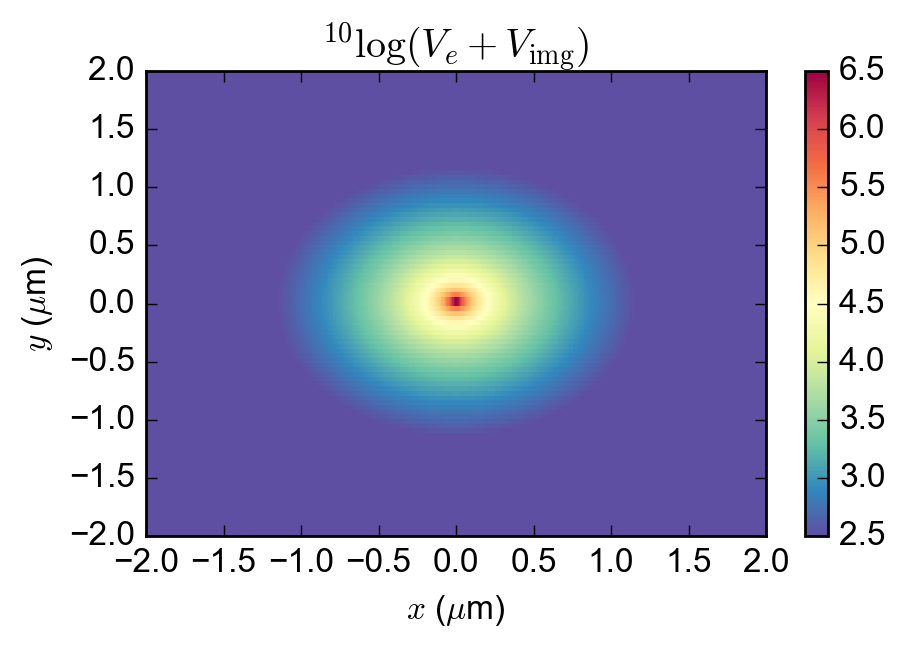

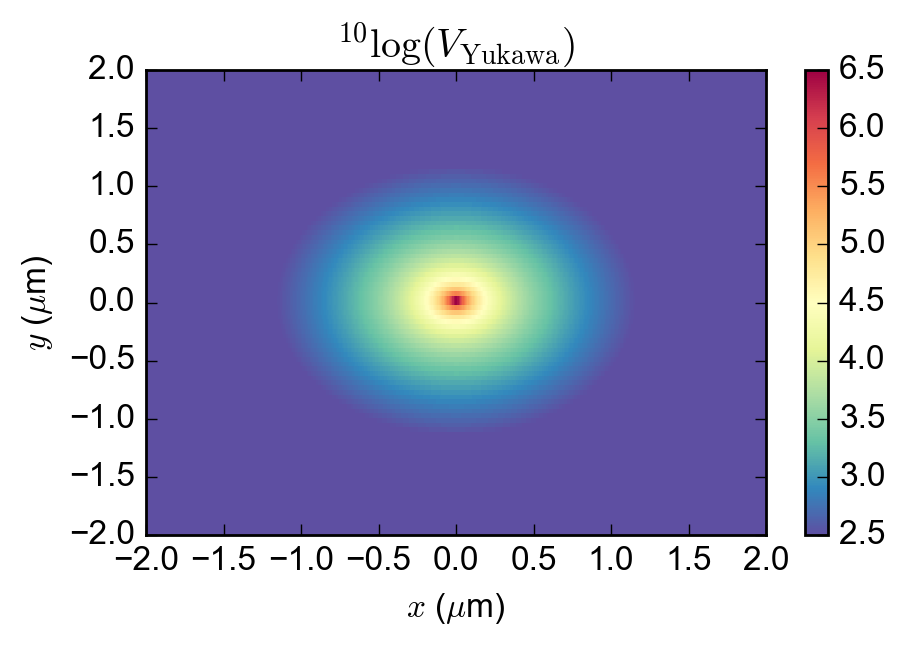

In [4]:
electrons_x = [0.0E-6]
electrons_y = [0.0E-6]

x = np.linspace(-2E-6, 2E-6, 5E2)
y = np.linspace(-2E-6, 2E-6, 1E2)
X, Y = np.meshgrid(x, y)

V = np.zeros(np.shape(X))
V_img = np.zeros(np.shape(X))
Yukawa = np.zeros(np.shape(X))

for e_x, e_y in zip(electrons_x, electrons_y):
    V += V_ee(X, Y, e_x, e_y)
    V_img += image_charge(X, Y, e_x, e_y)
    Yukawa += yukawa(X, Y, e_x, e_y, lamb)
    
plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.pcolormesh(X*1E6, Y*1E6, np.log10(V/e), cmap=plt.cm.Spectral_r, vmin=2.5, vmax=6.5)
plt.colorbar()
plt.xlabel(r"$x$ ($\mu$m)")
plt.ylabel(r"$y$ ($\mu$m)")
plt.title("$^{10}\log(V_e)$")

plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.pcolormesh(X*1E6, Y*1E6, np.log10((V + V_img)/e), cmap=plt.cm.Spectral_r, vmin=2.5, vmax=6.5)
plt.colorbar()
plt.xlabel(r"$x$ ($\mu$m)")
plt.ylabel(r"$y$ ($\mu$m)")
plt.title("$^{10}\log(V_e + V_{\mathrm{img}})$")

plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.pcolormesh(X*1E6, Y*1E6, np.log10(Yukawa/e), cmap=plt.cm.Spectral_r, vmin=2.5, vmax=6.5)
plt.colorbar()
plt.xlabel(r"$x$ ($\mu$m)")
plt.ylabel(r"$y$ ($\mu$m)")
plt.title("$^{10}\log(V_{\mathrm{Yukawa}})$")

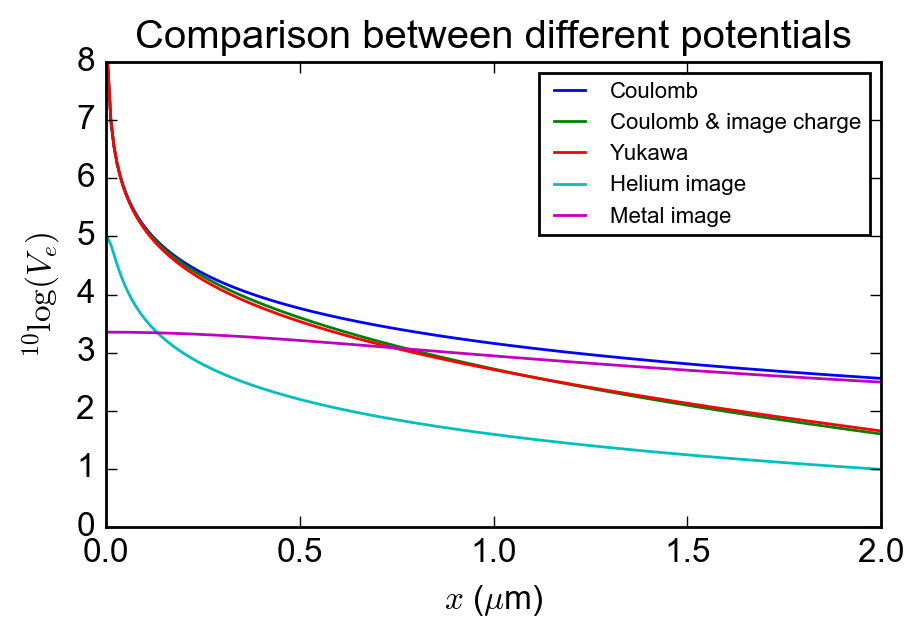

In [10]:
V = np.zeros(len(x))
V_img = np.zeros(len(x))
Yukawa = np.zeros(len(x))
Helium_img = np.zeros(len(x))
Metal_img = np.zeros(len(x))

for e_x, e_y in zip(electrons_x, electrons_y):
    V += V_ee(x, 0, e_x, e_y)
    V_img += image_charge(x, 0, e_x, e_y)
    Yukawa += yukawa(x, 0, e_x, e_y, lamb)
    Helium_img += helium_image_charge(x, 0, e_x, e_y)
    Metal_img += metal_image_charge(x, 0, e_x, e_y)

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.plot(x*1E6, np.log10(V/e), label="Coulomb", lw=1, alpha=1)
plt.plot(x*1E6, np.log10((V+V_img)/e), label="Coulomb & image charge")
plt.plot(x*1E6, np.log10(Yukawa/e), label="Yukawa")
plt.plot(x*1E6, np.log10(-Helium_img/e), label="Helium image")
plt.plot(x*1E6, np.log10(-Metal_img/e), label="Metal image")

plt.xlabel(r"$x$ ($\mu$m)")
plt.ylabel(r"$^{10}\log(V_e)$")
plt.legend(loc=0, prop={"size": 8})
plt.title("Comparison between different potentials")
plt.xlim(0,2)

common.save_figure(fig, save_path=os.path.join(os.getcwd(), "Figures"))

In [24]:
(epsHe-1)/(epsHe+1)

0.027237354085603138

In [9]:
os.getcwd()

'/Users/gkoolstra/Documents/Code/iPythonNotebooks'